# Introduction to NumPy

*Author: Evan Carey*

*Copyright 2017-2018, BH Analytics, LLC*

## Overview

The purpose of this section is to demonstrate functionality of Python that you will be learning in this course. We will be covering the following:


* ndArray object type
* dtypes
* slicing
* broadcasting
* summary statistics
* random number generation

## Libraries

In [2]:
import sys
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import textwrap

In [2]:
## Enable inline plotting for graphics
%matplotlib inline

In [3]:
## Get Version information
print(textwrap.fill(sys.version),'\n')
print("Pandas version: {0}".format(pd.__version__),'\n')
print("Matplotlib version: {0}".format(matplotlib.__version__),'\n')
print("Numpy version: {0}".format(np.__version__),'\n')
print("Seaborn version: {0}".format(sns.__version__),'\n')


3.6.5 |Anaconda, Inc.| (default, Apr 29 2018, 16:14:56)  [GCC 7.2.0] 

Pandas version: 0.23.0 

Matplotlib version: 2.2.2 

Numpy version: 1.14.3 

Seaborn version: 0.8.1 



## Check your working directory

Subsequent sessions may require you to identify and update your working directory so paths correctly point at the downloaded data files. You can check your working directory like so:

In [4]:
# Working Directory
print("My working directory:\n" + os.getcwd())
# Set Working Directory (if needed)
%cd ../
print("My new working directory:\n" + os.getcwd())

My working directory:
/home/ra/host/BH_Analytics/Discover/DataEngineering/notebooks
/home/ra/host/BH_Analytics/Discover/DataEngineering
My new working directory:
/home/ra/host/BH_Analytics/Discover/DataEngineering


## What is NumPy?

Numerical Python


* “Foundational” module for scientific computing
* Mimics Matlab interface
* Provides the “ndarray”
* This is the way linear algebra is accomplished in Python.
* This is the main class for scientific computing
* Has a “dtype” attribute
* We will briefly cover this, but the analytic focus will be on Pandas structures and constructs


## Setting Print Options

We can set the print options for numpy like so:

In [5]:
np.set_printoptions(linewidth=50)

## Ndarray

* It is customary to import NumPy as “np”
* Ndarray
  * N-dimensional array (alias is array)
  * Created with `array()` 


In [7]:
import numpy as np

# Create an array
ar1 = np.array(range(10))
print(ar1)
print(" {0}".format(ar1.ndim))

[0 1 2 3 4 5 6 7 8 9]
 1


In [11]:
# Create another array
ar2 = np.array([[1,2,3],[4,5,6]])
print(ar2)

[[1 2 3]
 [4 5 6]]


In [12]:
print(ar2.ndim)

2


In [15]:
print(ar2.shape)

(2, 3)


In [17]:
print(ar2.dtype)

int64


There are several other functions to create convenient arrays. Below are examples:

* `arange()`
* `ones()`	    create an array of all ones
* `zeros()`     create an array of all zeros
* `identity()`	create an identity matrix


In [18]:
# More array creation
print('Example 1:\n', np.ones((2,4)))

print('\n\n')

print('Example 2:\n', np.zeros((2,4)))
print('\n\n')

print('Example 3:\n', np.identity(5))


Example 1:
 [[1. 1. 1. 1.]
 [1. 1. 1. 1.]]



Example 2:
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]]



Example 3:
 [[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


In [14]:
np.eye(3) # another convenience function for an identity matrix

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

## Attributes

We can explore the attributes of NumPy arrays using the following syntax.

`ndim`: number of dimensions  
`shape`: list of the dimension lengths  
`size`: total number of elements  
`data`: elements of the array  
`dtype`: data type (beyond standard Python date types)


In [19]:
# Attributes
print(ar1.ndim)
print(ar2.ndim)
print(ar2.shape)
print(ar2.dtype)
print(ar2.size)

1
2
(2, 3)
int64
6


## Data Types

Arrays are fast, partially due to the data type mapping to lower level calls. This is mostly transparent, but we can specify the dtype
* `np.array(object[,dtype])`
* We can change type using `array.astype()`


In [18]:
# Dtype
ar3 = np.array([1,2,3,4,5,6], "float")
print(ar3.dtype)

float64


In [19]:
# change dtype
ar3 = ar3.astype("int")
print(ar3.dtype)

int64


In [21]:
# Other Dtypes:
print(np.array([True, False], "bool").dtype)
print(np.array(["Yes", "No"]).dtype)
print(np.array(["Yes", "No"], np.str_).dtype)

bool
<U3
<U3


More information here:   
https://jakevdp.github.io/PythonDataScienceHandbook/02.01-understanding-data-types.html#NumPy-Standard-Data-Types

## Indexing

* For one dimensional arrays, we index in the usual way
* These slices are views, not copies…
* Changes are *broadcasted* if need be
* Indexing is **end-exclusive**


In [20]:
# Indexing (slicing)
line = np.arange(1, 4*4*4+1)
print('Initial line ndarray:\n', line)

Initial line ndarray:
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16
 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32
 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64]


In [21]:
print('\nFirst element:', line[0])


First element: 1


In [22]:
print('Elements 1 through 4 but not including 5:', line[:4])

Elements 1 through 4 but not including 5: [1 2 3 4]


In [25]:
print('Last element to 9th from last element:', line[-1:-10:-1])

Last element to 9th from last element: [64 63 62 61 60 59 58 57 56]


In [26]:
print('Elements 2, 3, 2:', line[[1, 2, 1]])

Elements 2, 3, 2: [2 3 2]


In [23]:
line[:3] = 2
line

array([ 2,  2,  2,  4,  5,  6,  7,  8,  9, 10,
       11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
       31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
       41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64])

## Reshaping

If we need to change the shape of the array, we can reshape an array with `array.reshape()`. We often do this after creating an array if we want a specific shape/size. 

In [24]:
# Reshaping array
line = np.arange(1, 4*4*4+1)
print('Original array:\n', line)

Original array:
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16
 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32
 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64]


In [25]:
rectangle = line.reshape(4, 16)
print('4x16 rectangular reshape:\n', rectangle)

4x16 rectangular reshape:
 [[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15
  16]
 [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
  32]
 [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
  48]
 [49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
  64]]


## Multi-Dimensional Index

Indexing gets more interesting with multiple dimensions

Start with first axis, separate by commas. 


In [27]:
# Indexing Multiple Dimensions
print('First row of rectangle:', rectangle[0])
print(line.shape)
print(rectangle[1, :]) # equivalent, implied

First row of rectangle: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
(64,)
[17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32]


In [28]:
rectangle[1][:]

array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32])

In [29]:
print('4th row, 16th column of rectangle:', rectangle[3, 15])
print(rectangle[3][15]) # equivalent but avoid this use!

4th row, 16th column of rectangle: 64
64


## Boolean Index

We can also index using boolean values  
To show this, I introduce a normal random number generator from `numpy.random`... *more on this later*

These boolean values can be along an axis, or cover all elements.

In [30]:
# Boolean Index
np.random.seed(42)
norm_ar = np.random.randn(10).reshape(5, 2)
print(norm_ar)

[[ 0.49671415 -0.1382643 ]
 [ 0.64768854  1.52302986]
 [-0.23415337 -0.23413696]
 [ 1.57921282  0.76743473]
 [-0.46947439  0.54256004]]


In [31]:
tf = norm_ar > 1
print(tf)

[[False False]
 [False  True]
 [False False]
 [ True False]
 [False False]]


In [36]:
norm_ar[tf]

array([1.65143654, 1.26593626])

In [32]:
norm_ar[norm_ar > 1] # more typical use case

array([1.52302986, 1.57921282])

## Broadcasting

When we assign scalar elements, the results are *broadcasted* to the entire slice. For example, let's look at the `norm_ar` array we created and wherever there is a value greater than 0 let's replace it with 0.

In [32]:
# Broadcasting
print(norm_ar)

[[-1.0856306   0.99734545]
 [ 0.2829785  -1.50629471]
 [-0.57860025  1.65143654]
 [-2.42667924 -0.42891263]
 [ 1.26593626 -0.8667404 ]]


In [33]:
norm_ar[norm_ar > 0] = 0
print(norm_ar)

[[ 0.         -0.1382643 ]
 [ 0.          0.        ]
 [-0.23415337 -0.23413696]
 [ 0.          0.        ]
 [-0.46947439  0.        ]]


We can also perform mathematical functions between arrays and scalars. The scalar will be *broadcast*, also sometimes called vectorized calculations. Let's add the scalar, 1, to all the values in our 'norm_ar' array.

In [39]:
# Vectorized calculations
norm_ar + 1

array([[-0.0856306 ,  1.        ],
       [ 1.        , -0.50629471],
       [ 0.42139975,  1.        ],
       [-1.42667924,  0.57108737],
       [ 1.        ,  0.1332596 ]])

**Illustration of Broadcasting from the Handbook**   
<img src="https://jakevdp.github.io/PythonDataScienceHandbook/figures/02.05-broadcasting.png">

For a more detailed discussion of broadcasting rules, consult your handbook here:
https://jakevdp.github.io/PythonDataScienceHandbook/02.05-computation-on-arrays-broadcasting.html

## NumPy Functions

NumPy provides many functions you would expect in data science application. Let's explore a few of those below with our `norm_ar` array. 

In [34]:
# NumPy Functions
print(norm_ar)

[[ 0.         -0.1382643 ]
 [ 0.          0.        ]
 [-0.23415337 -0.23413696]
 [ 0.          0.        ]
 [-0.46947439  0.        ]]


In [35]:
print('Mean of entire array:', np.mean(norm_ar))

Mean of entire array: -0.10760290187786534


An additional parameter tells numpy along which axis, or in which direction (row-wise, column-wise, etc.) to calculate.

- axis = 0: 'column-wise'
- axis = 1: 'row-wise'


<table border=1 style="border:none;background:none;">
<tr style="border:none;background:none;"><td style="border:1px solid gray;">34.6</td><td style="border:1px solid gray;">78.5</td><td> &rarr; axis = 1 </td></tr>
<tr style="border:none;background:none;"><td>&darr;</td><td>&darr;</td><td></td></tr>
<tr style="background:none;"><td colspan=2 style="text-align:center">&nbsp;&nbsp;axis = 0</td><td></td></tr>
</table>

In [36]:
print('Means of each column:', np.mean(norm_ar, axis=0))

Means of each column: [-0.14072555 -0.07448025]


In [37]:
print('Means of each row:\n', np.mean(norm_ar, 1))

Means of each row:
 [-0.06913215  0.         -0.23414517  0.
 -0.23473719]


In [43]:
print('Variance of entire array:', np.var(norm_ar))

Variance of entire array: 0.5855124016656363


There is also an array min and array max function...

In [38]:
np.amin(norm_ar, axis=0)

array([-0.46947439, -0.23413696])

In [39]:
np.amax(norm_ar,axis=1)

array([ 0.        ,  0.        , -0.23413696,
        0.        ,  0.        ])

## uFuncs

Universal functions work elementwise on an array by default. Here are a few examples:

In [45]:
## Universal functions operate elementwise unless otherwise specified
norm_ar*10

array([[-10.85630603,   0.        ],
       [  0.        , -15.06294714],
       [ -5.78600252,   0.        ],
       [-24.26679243,  -4.28912629],
       [  0.        ,  -8.66740402]])

In [46]:
np.sqrt(np.abs(norm_ar))


array([[1.04193599, 0.        ],
       [0.        , 1.22731199],
       [0.76065778, 0.        ],
       [1.55778023, 0.65491421],
       [0.        , 0.93098894]])

In [47]:
np.exp(norm_ar)

array([[0.33768877, 1.        ],
       [1.        , 0.22173003],
       [0.56068263, 1.        ],
       [0.08832967, 0.65121682],
       [1.        , 0.42031939]])

In [48]:
np.abs(norm_ar)

array([[1.0856306 , 0.        ],
       [0.        , 1.50629471],
       [0.57860025, 0.        ],
       [2.42667924, 0.42891263],
       [0.        , 0.8667404 ]])

Available ufuncs here:     
https://docs.scipy.org/doc/numpy-1.13.0/reference/ufuncs.html#available-ufuncs

## Random Numbers

NumPy has a random number generation module: `help(np.random)`  
We can set the seed using the `np.random.seed()`  
http://docs.scipy.org/doc/numpy/reference/routines.random.html


Here we will generate numbers from a uniform distribution between 0 and 1. 

In [40]:
np.random.seed(42)
# uniform [0,1)
np.random.rand(4, 4)

array([[0.37454012, 0.95071431, 0.73199394,
        0.59865848],
       [0.15601864, 0.15599452, 0.05808361,
        0.86617615],
       [0.60111501, 0.70807258, 0.02058449,
        0.96990985],
       [0.83244264, 0.21233911, 0.18182497,
        0.18340451]])

This line of code will generate numbers from a normal distribution with mean 0 and variance 1. Notice we have specified the resulting shape to be in 3 dimensions. 

In [41]:
np.random.seed(42)
# normal(mean=0,var=1)
np.random.randn(2, 2, 2)

array([[[ 0.49671415, -0.1382643 ],
        [ 0.64768854,  1.52302986]],

       [[-0.23415337, -0.23413696],
        [ 1.57921282,  0.76743473]]])

If I wanted to change the mean and variance, I could do so directly after the simulation like so:

In [51]:
np.random.seed(42)
# normal(mean=10, sd=4)
4*np.random.randn(2,2,2) + 10

array([[[11.98685661,  9.4469428 ],
        [12.59075415, 16.09211943]],

       [[ 9.0633865 ,  9.06345217],
        [16.31685126, 13.06973892]]])

However, there is another way to generate more complex distributions. We can call the name of the distribution directly (Check the documentation for the full list).

Here is an example of the normal distribution again, using the numpy random.normal function (the distribution name function):

In [42]:
# normal distribution, sd = 3
np.random.seed(42)
norm1 = np.random.normal(loc=10, scale=3, size=100)
norm1

array([11.49014246,  9.5852071 , 11.94306561,
       14.56908957,  9.29753988,  9.29758913,
       14.73763845, 12.30230419,  8.59157684,
       11.62768013,  8.60974692,  8.60281074,
       10.72588681,  4.26015927,  4.8252465 ,
        8.31313741,  6.96150664, 10.942742  ,
        7.27592777,  5.7630889 , 14.39694631,
        9.3226711 , 10.20258461,  5.72575544,
        8.36685183, 10.33276777,  6.54701927,
       11.12709406,  8.19808393,  9.12491875,
        8.19488016, 15.55683455,  9.95950833,
        6.82686721, 12.46763474,  6.33746905,
       10.62659079,  4.12098963,  6.01544185,
       10.59058371, 12.21539974, 10.51410484,
        9.65305515,  9.09668891,  5.56443403,
        7.84046737,  8.61808369, 13.17136668,
       11.03085487,  4.71087953, 10.97225191,
        8.84475316,  7.969234  , 11.83502887,
       13.09299857, 12.79384036,  7.48234743,
        9.07236287, 10.99379029, 12.92663538,
        8.56247729,  9.44302307,  6.68099508,
        6.41138013, 12.43757747, 1

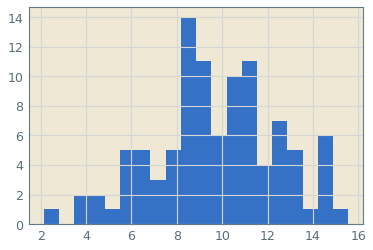

In [43]:
n, bins, patches = plt.hist(norm1, bins=20)

Here is an example of the binomial distribution:

In [44]:
np.random.seed(42)
# binomial (100 trials, probability of success=0.2,  samples)
bin1 = np.random.binomial(n=1, p=0.2, size=100)
print(bin1)

[0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0]


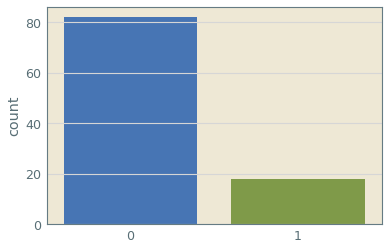

In [45]:
sns.countplot(bin1)

Here is another example of the binomial distribution with more than one trial.

In [46]:
# binomial (100 trials, probability of success=0.2, 50 samples)
np.random.binomial(n=100, p=0.2, size=50)

array([13, 21, 18, 20, 25, 17, 19, 23, 17, 14,
       18, 16, 26, 23, 21, 25, 23, 16, 25, 20,
       23, 25, 18, 15, 17, 19, 24, 24, 11, 20,
       19, 17, 15, 18, 26, 18, 20, 22, 19, 28,
       27, 17, 20, 18, 18, 13, 21, 20, 14, 18])

Numpy provides random number generation from other probability distributions such as binomial, poisson, uniform, and many others...   
https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.random.html#distributions

## Concatenation / Conversion

* We may wish to “bind” two arrays
* We may wish to convert an array to a list for use in a different module function which expects a list


In [59]:
# concatenate
bin_ar = np.array(range(5))
ar1 = np.zeros(5)
np.vstack((bin_ar, ar1))

array([[0., 1., 2., 3., 4.],
       [0., 0., 0., 0., 0.]])

In [60]:
# alternatively
bin_ar = bin_ar.reshape((5, 1))
ar2 = np.zeros((5, 1))
np.hstack((bin_ar, ar2))

array([[0., 0.],
       [1., 0.],
       [2., 0.],
       [3., 0.],
       [4., 0.]])

In [61]:
# convert to (nested) list
result = bin_ar.tolist()
print(result)

[[0], [1], [2], [3], [4]]


## Numpy Iteration

If we treat an ndarray as an iterable, we will be iterating through the rows.

In [49]:
## iteration through columns or rows of ndarray
np.random.seed(12)
ar1 = np.random.poisson(10, 6).reshape(3, 2)
ar1

array([[ 6,  8],
       [15, 17],
       [ 8, 16]])

In [63]:
for i in ar1:
    print(i)

[6 8]
[15 17]
[ 8 16]


In [50]:
## How would you iterate columns?
for i in ar1.transpose():
    print(i)

[ 6 15  8]
[ 8 17 16]


In [51]:
## More concise
for i in ar1.T:
    print(i)

[ 6 15  8]
[ 8 17 16]


## Conclusion

This is a *very* brief introduction to Numpy. Numpy contains many more useful methods and functions, and is leveraged by other scientific packages for its linear algebra, math and stats methods, complex arrays and more. 

Read the chapter on Numpy in your handbook here for more details:

https://jakevdp.github.io/PythonDataScienceHandbook/02.00-introduction-to-numpy.html